<a href="https://colab.research.google.com/github/Indukurivigneshvarma/Deep_Learning/blob/main/Computer_Vision/Faster_R_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import requests
import matplotlib.pyplot as plt
import cv2
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"
model = fasterrcnn_resnet50_fpn(pretrained=True).to(device)
model.eval()
print("✅ Loaded Faster R-CNN model on:", device)

✅ Loaded Faster R-CNN model on: cuda


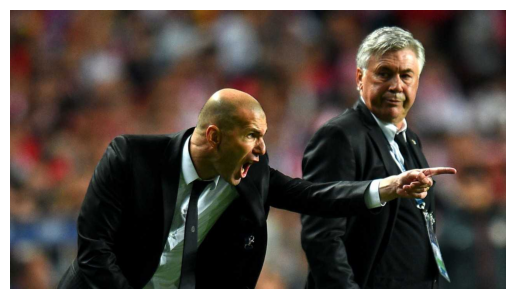

In [3]:
img_url = "https://ultralytics.com/images/zidane.jpg"
img = Image.open(requests.get(img_url, stream=True).raw).convert("RGB")

plt.imshow(img)
plt.axis("off")
plt.show()

In [4]:
img_tensor = F.to_tensor(img).unsqueeze(0).to(device)

with torch.no_grad():
    preds = model(img_tensor)

preds = [{k: v.to("cpu") for k, v in t.items()} for t in preds]
print("Detected classes:", len(preds[0]['labels']))

Detected classes: 36


In [5]:
COCO_CLASSES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
    'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack',
    'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard',
    'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork',
    'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
    'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse',
    'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
    'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
    'hair drier', 'toothbrush'
]


In [7]:
labels = preds[0]['labels'].numpy()
unique_labels = np.unique(labels)

print("Total objects detected:", len(labels))
print("Unique classes detected:", len(unique_labels))
print("Class names detected:")

for l in unique_labels:
    if l < len(COCO_CLASSES):
        print("-", COCO_CLASSES[l])
    else:
        print("-", f"Unknown class ID: {l}")

Total objects detected: 36
Unique classes detected: 9
Class names detected:
- person
- tie
- skis
- snowboard
- fork
- banana
- book
- scissors
- Unknown class ID: 87


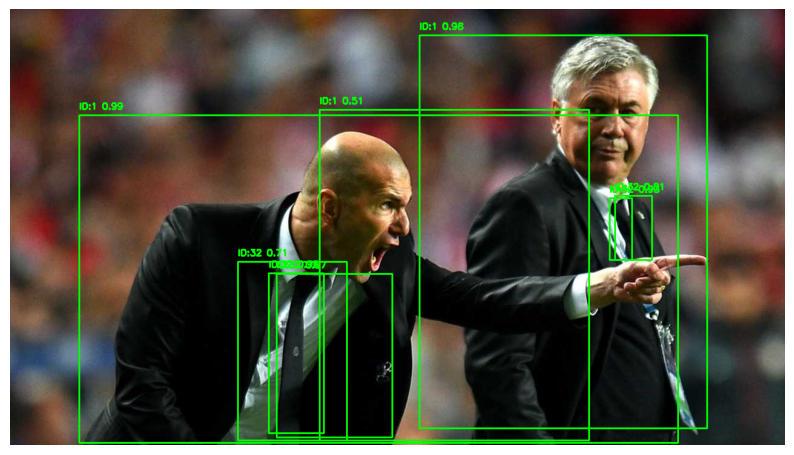

In [8]:
img_np = np.array(img)

for box, score, label in zip(preds[0]["boxes"], preds[0]["scores"], preds[0]["labels"]):
    if score > 0.5:
        x1, y1, x2, y2 = box.detach().cpu().numpy().astype(int)
        cv2.rectangle(img_np, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img_np, f"ID:{label.item()} {score:.2f}", (x1, max(y1-10, 10)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

plt.figure(figsize=(10,6))
plt.imshow(img_np)
plt.axis("off")
plt.show()